# First effort: transferring the time series operation included in the challenge ML07/

# Setup

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

from os import path

# Loading data

In [13]:
### For now, let's just work with the main table FactSales
data = pd.read_csv("../raw_data/FactSales.csv")

data.set_index(['SalesKey'], inplace=True)

data.head()

,DateKey,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount
SalesKey,,,,,,,,,,,,,,,
1,2007-01-02,1,209,956,10,1,91.05,198.0,8,0,0.0,1,39.600,728.40,1544.400
2,2007-02-12,4,308,766,2,1,10.15,19.9,4,0,0.0,1,0.995,40.60,78.605
3,2008-01-24,1,156,1175,11,1,209.03,410.0,9,0,0.0,3,61.500,1881.27,3628.500
4,2008-01-13,2,306,1429,10,1,132.90,289.0,8,0,0.0,1,57.800,1063.20,2254.200
5,2008-01-22,2,306,1133,10,1,144.52,436.2,24,0,0.0,3,261.720,3468.48,10207.080


In [45]:
data.describe()

,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount
count,3.406089e+06,3.406089e+06,3.406089e+06,3.406089e+06,3406089.0,3.406089e+06,3.406089e+06,3.406089e+06,3.406089e+06,3.406089e+06,3.406089e+06,3.406089e+06,3.406089e+06,3.406089e+06
mean,1.658594e+00,1.988587e+02,1.275001e+03,8.465855e+00,1.0,1.370120e+02,3.204862e+02,1.565445e+01,1.449131e-01,4.604676e+01,1.494046e+00,5.993886e+01,1.575090e+03,3.644549e+03
std,1.028630e+00,9.489878e+01,7.117874e+02,8.220495e+00,0.0,1.675636e+02,4.285798e+02,3.361445e+01,3.627755e-01,2.025121e+02,1.825627e+00,1.645126e+02,2.110969e+03,5.312442e+03
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,4.800000e-01,9.500000e-01,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.920000e+00,3.040000e+00
25%,1.000000e+00,1.260000e+02,6.630000e+02,1.000000e+00,1.0,3.219000e+01,6.800000e+01,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.058500e+02,6.119400e+02
50%,1.000000e+00,2.000000e+02,1.267000e+03,4.000000e+00,1.0,8.412000e+01,1.900000e+02,1.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,2.532000e+00,9.432800e+02,2.105883e+03
75%,2.000000e+00,3.000000e+02,1.904000e+03,1.400000e+01,1.0,1.662000e+02,3.690000e+02,1.300000e+01,0.000000e+00,0.000000e+00,3.000000e+00,5.160000e+01,2.024730e+03,4.557105e+03
max,4.000000e+00,3.100000e+02,2.517000e+03,2.800000e+01,1.0,1.060220e+03,3.199990e+03,2.880000e+03,5.000000e+00,9.996000e+03,2.400000e+01,7.958700e+03,1.371178e+05,4.080160e+05


In [15]:
data.shape

(3406089, 15)

In [20]:
data.isna().sum()

DateKey             0
channelKey          0
StoreKey            0
ProductKey          0
PromotionKey        0
CurrencyKey         0
UnitCost            0
UnitPrice           0
SalesQuantity       0
ReturnQuantity      0
ReturnAmount        0
DiscountQuantity    0
DiscountAmount      0
TotalCost           0
SalesAmount         0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3406089 entries, 1 to 3406089
Data columns (total 15 columns):
 #   Column            Dtype         
---  ------            -----         
 0   DateKey           datetime64[ns]
 1   channelKey        int64         
 2   StoreKey          int64         
 3   ProductKey        int64         
 4   PromotionKey      int64         
 5   CurrencyKey       int64         
 6   UnitCost          float64       
 7   UnitPrice         float64       
 8   SalesQuantity     int64         
 9   ReturnQuantity    int64         
 10  ReturnAmount      float64       
 11  DiscountQuantity  int64         
 12  DiscountAmount    float64       
 13  TotalCost         float64       
 14  SalesAmount       float64       
dtypes: datetime64[ns](1), float64(6), int64(8)
memory usage: 415.8 MB


In [43]:
data.isnull().sum()

DateKey             0
channelKey          0
StoreKey            0
ProductKey          0
PromotionKey        0
CurrencyKey         0
UnitCost            0
UnitPrice           0
SalesQuantity       0
ReturnQuantity      0
ReturnAmount        0
DiscountQuantity    0
DiscountAmount      0
TotalCost           0
SalesAmount         0
dtype: int64

In [11]:
data.dtypes

SalesKey              int64
DateKey              object
channelKey            int64
StoreKey              int64
ProductKey            int64
PromotionKey          int64
CurrencyKey           int64
UnitCost            float64
UnitPrice           float64
SalesQuantity         int64
ReturnQuantity        int64
ReturnAmount        float64
DiscountQuantity      int64
DiscountAmount      float64
TotalCost           float64
SalesAmount         float64
dtype: object

In [14]:
data['DateKey'] = pd.to_datetime(data['DateKey'], infer_datetime_format=True)

# Data exploration

In [23]:
# Let's keep 30% of the values out for testing purposes
train_size = 0.7
split_index = round(train_size*data.shape[0])

data_train = data.iloc[:split_index]
data_test = data.iloc[split_index:]

In [27]:
y_pred = data_test["SalesAmount"].shift(1).dropna()
y_pred

SalesKey
2384264      156.800
2384265      734.400
2384266     4399.000
2384267     5993.460
2384268     2168.040
             ...    
3406085     2879.928
3406086        4.750
3406087    11976.000
3406088      849.830
3406089    20310.750
Name: SalesAmount, Length: 1021826, dtype: float64

### Baseline: predicting the next from previous value

In [29]:
from sklearn.metrics import r2_score

y_true = data_test["SalesAmount"][1:]

print(f"R2: {r2_score(y_true, y_pred)}")

R2: -0.9958777239982473


## Seasonal time series analysis

#### **If we are interested in additional variables, we should include them in our dataset beforehand**

In [48]:
data_seasonal = data.groupby("DateKey").sum()
data_seasonal = data.groupby("DateKey").agg(
    {"UnitCost": "sum", "UnitPrice": "sum", "ReturnQuantity": "sum", "ReturnAmount": "sum", "DiscountQuantity": "sum", "DiscountAmount": "sum", "TotalCost": "sum", "SalesQuantity": "sum", "SalesAmount": "sum"})

print(data_seasonal.shape)
data_seasonal.head()

(1096, 9)


,UnitCost,UnitPrice,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesQuantity,SalesAmount
DateKey,,,,,,,,,
2007-01-01,366532.85,836949.226,533,115502.510,8402,196886.0684,3667018.43,37237,8.310498e+06
2007-01-02,377069.54,853070.198,510,124318.940,8231,204971.8391,3697809.22,38193,8.326143e+06
2007-01-03,371929.21,843061.284,594,124771.940,8386,198631.5069,3695293.94,38671,8.409919e+06
2007-01-04,368132.73,842069.948,509,126866.100,8286,193369.2363,3591397.68,36968,8.231880e+06
2007-01-05,369473.78,840852.896,561,141977.748,8228,199059.7830,3552350.93,36237,8.089676e+06


In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

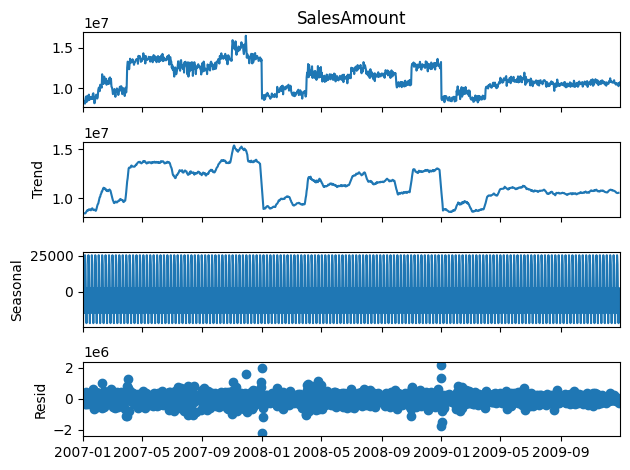

In [49]:
# Additive Decomposition (y = Trend + Seasonal + Residuals)
result_add = seasonal_decompose(data_seasonal['SalesAmount'], model='additive')
result_add.plot();

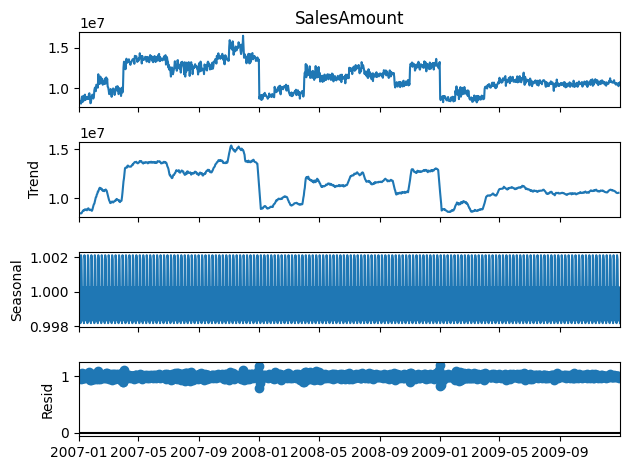

In [51]:
# Multiplicative Decomposition (y = Trend * Seasonal * Residuals)
result_mul = seasonal_decompose(data_seasonal['SalesAmount'], model='multiplicative')
result_mul.plot();

<Axes: xlabel='DateKey'>

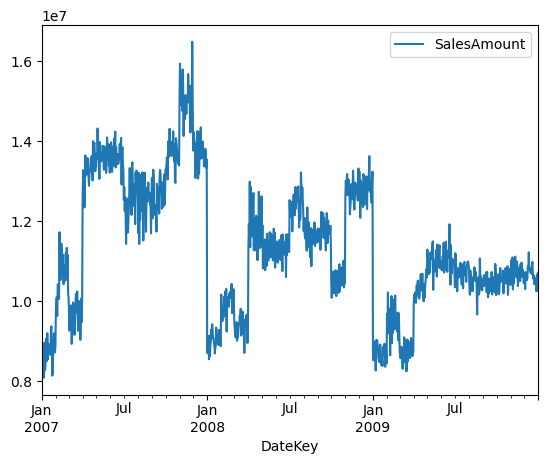

In [54]:
data_seasonal.plot(y = "SalesAmount")

<Axes: xlabel='DateKey'>

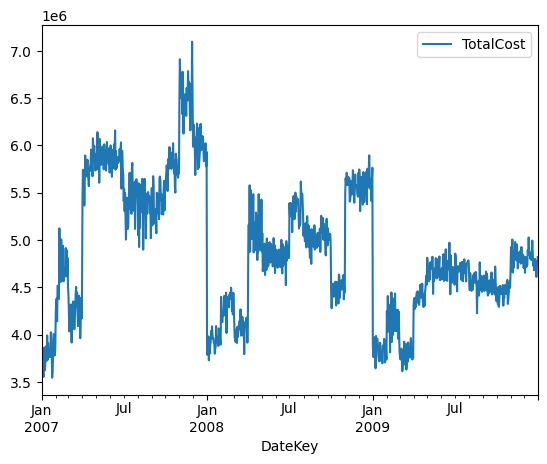

In [55]:
data_seasonal.plot(y = "TotalCost")